In [1]:
from sympy import *

In [29]:
x, y, th0, th1, t1 = symbols('x y Theta_0 Theta_1 t_1', real=True, positive=True)
sig_sq, sig1_sq = symbols('sigma__2 sigma_t__2', real=True, positive=True)

In [30]:
mu = th0 + th1*x
likelihood = exp(-(y-mu)**2/(2*sig_sq))
prior=exp(-(th1-t1)**2/(2*sig1_sq))
posterior=likelihood*prior
posterior=posterior.simplify()

In [31]:
norm = integrate(posterior, (th0, -oo, oo), (th1, -oo, oo)).simplify()
posterior = posterior / norm
posterior

exp(-(Theta_1 - t_1)**2/(2*sigma_t__2) - (Theta_0 + Theta_1*x - y)**2/(2*sigma__2))/(2*pi*sqrt(sigma__2)*sqrt(sigma_t__2))

In [32]:
marginal = integrate(posterior, (th1, -oo, oo)).simplify()
marginal

sqrt(2)*exp((-sigma__2*t_1**2 + sigma_t__2*(-Theta_0**2 + 2*Theta_0*y - y**2) + (-Theta_0*sigma_t__2*x + sigma__2*t_1 + sigma_t__2*x*y)**2/(sigma__2 + sigma_t__2*x**2))/(2*sigma__2*sigma_t__2))/(2*sqrt(pi)*sqrt(sigma__2 + sigma_t__2*x**2))

In [33]:
integrate(marginal, (th0, -oo, oo)).simplify()

1

In [56]:
solve(marginal.diff(th0))

[{Theta_0: -t_1*x + y}]

In [75]:
x2, y2, sig_sq2 = symbols('x2 y2 sigma_2__2', real=True, positive=True)
two =  marginal*marginal.subs([(x,x2), (y, y2),(sig_sq, sig_sq2)])
sol = solve(log(two.expand()).simplify().series(th0, 0).diff(th0))
sol

[{Theta_0: (-sigma_2__2*t_1*x + sigma_2__2*y - sigma__2*t_1*x2 + sigma__2*y2 - sigma_t__2*t_1*x**2*x2 - sigma_t__2*t_1*x*x2**2 + sigma_t__2*x**2*y2 + sigma_t__2*x2**2*y)/(sigma_2__2 + sigma__2 + sigma_t__2*x**2 + sigma_t__2*x2**2)}]

In [76]:
list(sol[0].values())[0].simplify()

(-sigma_2__2*t_1*x + sigma_2__2*y - sigma__2*t_1*x2 + sigma__2*y2 - sigma_t__2*t_1*x**2*x2 - sigma_t__2*t_1*x*x2**2 + sigma_t__2*x**2*y2 + sigma_t__2*x2**2*y)/(sigma_2__2 + sigma__2 + sigma_t__2*x**2 + sigma_t__2*x2**2)

In [34]:
log(marginal.expand()).simplify().series(th0, 0).simplify().series(th0, 0)

-Theta_0**2/(2*(sigma__2 + sigma_t__2*x**2)) + Theta_0*(-t_1*x/(sigma__2 + sigma_t__2*x**2) + y/(sigma__2 + sigma_t__2*x**2)) - t_1**2*x**2/(2*(sigma__2 + sigma_t__2*x**2)) + t_1*x*y/(sigma__2 + sigma_t__2*x**2) - y**2/(2*(sigma__2 + sigma_t__2*x**2)) - log(2**(sigma__2 + sigma_t__2*x**2)*pi**(sigma__2 + sigma_t__2*x**2)*(sigma__2 + sigma_t__2*x**2)**(sigma__2 + sigma_t__2*x**2))/(2*(sigma__2 + sigma_t__2*x**2))

In [ ]:
marginal.subs([(x,1), (t1, 1), (y,2), (sig_sq, 1), (sig1_sq, 1)]).simplify()

exp(-Theta_0**2/4 + Theta_0/2 - 1/4)/(2*sqrt(pi))

In [7]:
lambda_function = lambdify((th0, t1), marginal.subs([(x, 1), (y,0), (sig_sq, 1), (sig1_sq, 1)]), "numpy")

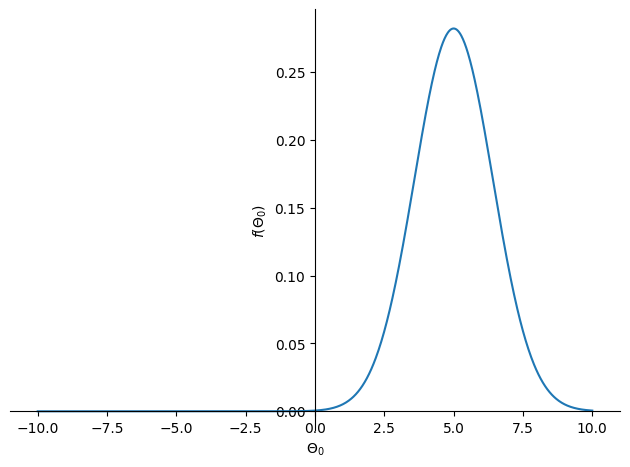

In [41]:
plot(marginal.subs([(x,1), (t1, 1), (y,6), (sig_sq, 1), (sig1_sq, 1)]), (th0, -10,10))

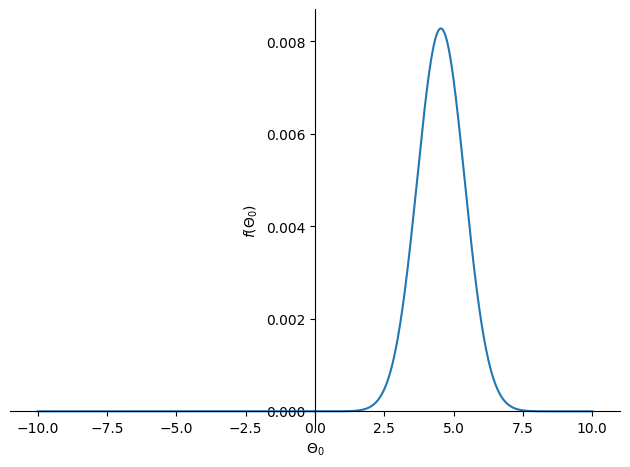

In [47]:
two =  marginal.subs([(x,1), (t1, 1), (y,7), (sig_sq, 0.15), (sig1_sq, 1)])*marginal.subs([(x,1), (t1, 1), (y,3), (sig_sq, 1), (sig1_sq, 1)])
plot(two, (th0, -10,10))


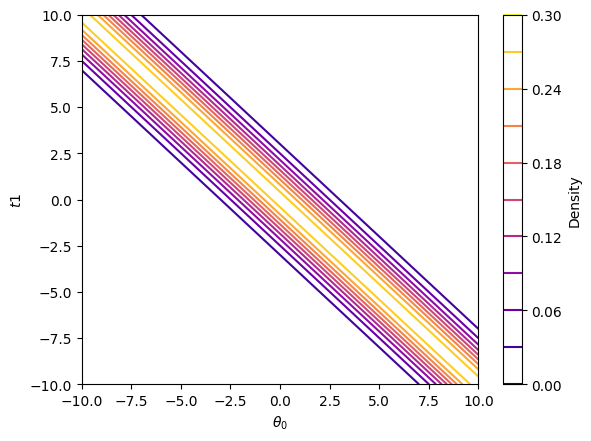

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def plot_2d_pdf_contour(lambda_function, x_range=(-10, 10), y_range=(-10, 10), resolution=100):
    x = np.linspace(x_range[0], x_range[1], resolution)
    y = np.linspace(y_range[0], y_range[1], resolution)
    X, Y = np.meshgrid(x, y)
    
    Z = lambda_function(X, Y)

    plt.contour(X, Y, Z, cmap='plasma', levels=10)
    plt.xlabel(r'$\theta_0$')
    plt.ylabel(r'$t1$')
    plt.colorbar(label='Density')
    plt.show()

lambda_function = lambdify((th0, t1), marginal.subs([(x, 1), (y,0), (sig_sq, 1), (sig1_sq, 1)]), "numpy")
plot_2d_pdf_contour(lambda_function)